In [1]:
import nltk

In [1]:
# nltk.download_shell()

In [6]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [8]:
for mes_no,message in enumerate(messages[:10]):
    print(mes_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
import pandas as pd

In [12]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','message'])

In [13]:
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['length'] = df['message'].apply(len)

In [15]:
df.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [18]:
df.groupby('labels').describe()

length                                                         
         count        mean        std   min    25%    50%    75%    max
labels                                                                 
ham     4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam     747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [19]:
df.groupby('length').describe()

labels                  message         \
        count unique  top freq   count unique   
length                                          
2           4      1  ham    4       4      1   
3           8      1  ham    8       8      4   
4           6      1  ham    6       6      3   
5          11      1  ham   11      11      2   
6           3      1  ham    3       3      3   
...       ...    ...  ...  ...     ...    ...   
588         2      1  ham    2       2      1   
611         1      1  ham    1       1      1   
629         1      1  ham    1       1      1   
790         1      1  ham    1       1      1   
910         1      1  ham    1       1      1   

                                                                
                                                      top freq  
length                                                          
2                                                      Ok    4  
3                                                     Ok.    4  
4                                                    Okie    4  
5                                                   Ok...   10  
6                                                  Yup...    1  
...                                                   ...  ...  
588     Sad story of a Man - Last week was my b'day. M...    2  
611     How to Make a girl Happy? It's not at all diff...    1  
629     Indians r poor but India is not a poor country...    1  
790     The last thing i ever wanted to do was hurt yo...    1  
910     For me the love should start with attraction.i...    1  

[274 rows x 8 columns]

In [20]:
df['length'].describecribe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E6F9E0040>,
      dtype=object)

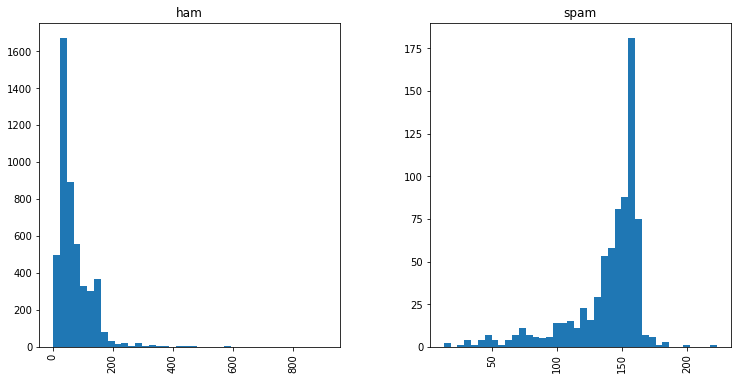

In [26]:
df.hist(column='length',by='labels',bins=40,figsize=(12,6))